In [1]:
!pip freeze | grep "qiskit"

qiskit==1.3.1
qiskit-addon-cutting==0.9.0
qiskit-aer==0.16.0
qiskit-algorithms==0.3.1
qiskit-experiments==0.8.1
qiskit-ibm-experiment==0.4.8
qiskit-ibm-provider==0.11.0
qiskit-ibm-runtime==0.34.0
qiskit-machine-learning==0.8.2
qiskit-nature==0.7.2


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np

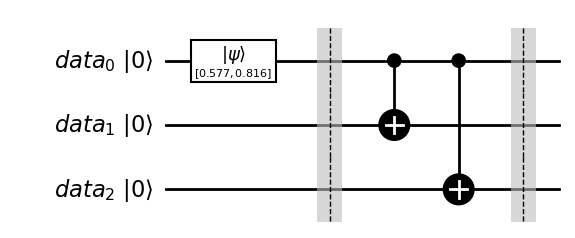

In [3]:
initial_state = [1 / np.sqrt(3), np.sqrt(2 / 3)]
qr = QuantumRegister(3, "data")
ar = QuantumRegister(2, "ancilla")
syn = ClassicalRegister(2, "syndrome")
cr = ClassicalRegister(3, "outcome")
qc = QuantumCircuit(qr, ar, syn, cr)

qc.initialize(initial_state, 0)
qc.barrier()

qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[2])
qc.barrier()

qc.draw("mpl", style="bw", fold=-1, initial_state=True, idle_wires=False)

In [4]:
qc_copy = qc.copy()
qc_copy.measure(qr, cr)

counts_ideal = AerSimulator().run(qc_copy, shots=1000).result().get_counts()
counts_ideal

{'000 00': 351, '111 00': 649}

inject error

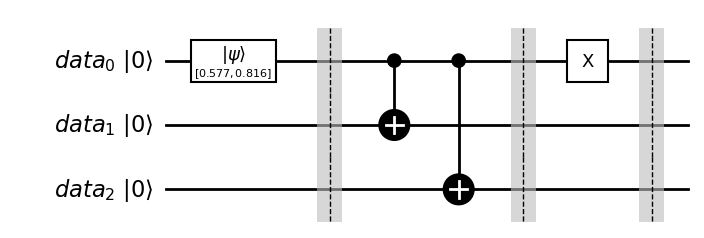

In [5]:
qc.x(0)
qc.barrier()
qc.draw("mpl", style="bw", fold=-1, initial_state=True, idle_wires=False)

syndrome extraction

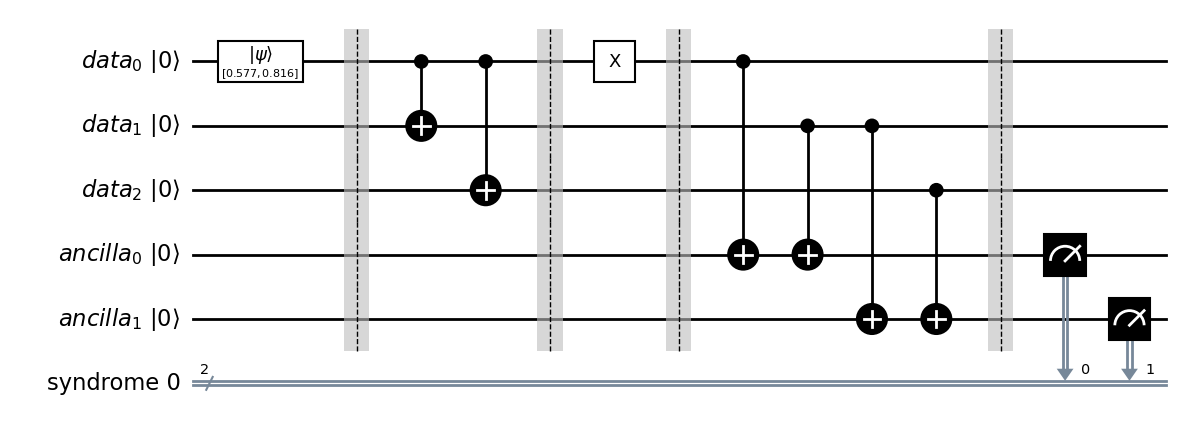

In [6]:
qc.cx(qr[0], ar[0])
qc.cx(qr[1], ar[0])
qc.cx(qr[1], ar[1])
qc.cx(qr[2], ar[1])
qc.barrier()
qc.measure(ar, syn)

qc.draw("mpl", style="bw", fold=-1, initial_state=True, idle_wires=False)

apply correction


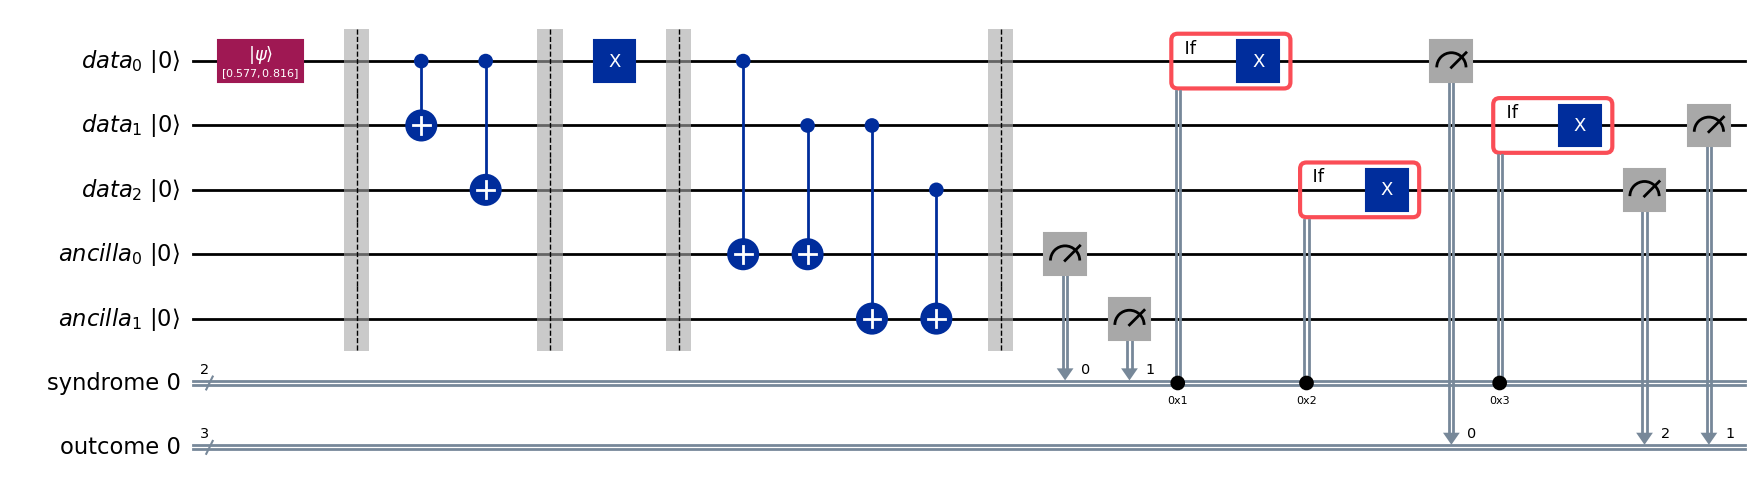

In [7]:
with qc.if_test((syn, 1)):
    qc.x(qr[0])
with qc.if_test((syn, 2)):
    qc.x(qr[2])
with qc.if_test((syn, 3)):
    qc.x(qr[1])

qc.measure(qr, cr)
qc.draw("mpl", fold=-1, initial_state=True, idle_wires=False)

In [8]:
counts = AerSimulator().run(qc, shots=100).result().get_counts()
counts

{'000 01': 38, '111 01': 62}